<h1> Movie Recommender in Python </h1>

We have implemented two types of recommender systems:-
<li> <b>Demographic Filtering</b> - User gets recommendation based on movie popularity and/or genre. 
<li> <b>Content Based Filtering</b> - User gets recommendaton based on the movie's metadata like director, actors, genre, description etc.

In [1]:
import pandas as pd 
import numpy as np 

credits_data=pd.read_csv('C:\\Path\\tmdb_5000_credits.csv')
movies_data=pd.read_csv('C:\\Path\\tmdb_5000_movies.csv')

In [2]:
#merging both the data of credits and movies dataset into one dataset
credits_data.columns = ['id','tittle','cast','crew']
movies_data= movies_data.merge(credits_data,on='id')

In [3]:
#There are about 4803 movies available in the dataset
movies_data.shape

(4803, 23)

In [4]:
#making sure data is merged correctly by looking at the head of the dataset
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


<h2>Implementation of Demographic based filtering starts from here...</h2>

<p> I'll be using <b>IMDB's weighted rating (wr)</b> which is given as :- </p>
<img src="https://image.ibb.co/jYWZp9/wr.png">

where,<br>
v is the number of votes for the movie; <b>(v_count)</b><br>
m is the minimum votes required to be listed in the chart; <b>(min_votes)</b><br>
R is the average rating of the movie; <b>(v_avg)</b>  and<br>
C is the mean vote across the whole report <b>(mean_vote_score)</b><br>

In [5]:
#Finding C for the formula which is mean_vote_score. 

#Calculating the mean rating of all the movies
mean_vote_score = movies_data['vote_average'].mean()
print("The mean rating of all the movies is",mean_vote_score,"on the scale of 10.")


The mean rating of all the movies is 6.092171559442011 on the scale of 10.


In [6]:
#Finding m for the formula which is min_votes.

#Calculating the minimum vote count for a movie required to be listed in the chart by selecting 90th percentile of the vote_count as a cutoff

min_votes= movies_data['vote_count'].quantile(0.9)
min_votes

1838.4000000000015

In [7]:
#Filtering movies who has minimum votes required based on min_Votes
movies = movies_data.copy().loc[movies_data['vote_count'] >= min_votes]

#Out of 4803 movies, we have narrowed down to 481 movies based on the minimum votes required to be considered for the list
movies.shape

(481, 23)

In [8]:
#defining a function to use the IMDB's weighted rating(wr) formula to calculate the weightage score of movie ratings to recommend a movie

def rating_weight(x, min_votes=min_votes, mean_vote_score=mean_vote_score):
    v_count = x['vote_count']
    v_avg = x['vote_average']
    # Calculation based on the IMDB formula
    return (v_count/(v_count+min_votes) * v_avg) + (min_votes/(min_votes+v_count) * mean_vote_score)

In [9]:
# Define a new feature 'score' in the movies dataset with 481 movies by storing the value of weight rating of movies from rating_weight()

movies['score'] = movies.apply(rating_weight, axis=1)

In [10]:
#Sorting movies based on the score calculated above
movies = movies.sort_values('score', ascending=False)

#Showing the top 20 movies based in the movie score as per IMDB's formula
movies[['title', 'score', 'vote_count', 'vote_average']].head(20)

,title,score,vote_count,vote_average
1881,The Shawshank Redemption,8.059258,8205,8.5
662,Fight Club,7.939256,9413,8.3
65,The Dark Knight,7.920020,12002,8.2
3232,Pulp Fiction,7.904645,8428,8.3
96,Inception,7.863239,13752,8.1
3337,The Godfather,7.851236,5893,8.4
95,Interstellar,7.809479,10867,8.1
809,Forrest Gump,7.803188,7927,8.2
329,The Lord of the Rings: The Return of the King,7.727243,8064,8.1
1990,The Empire Strikes Back,7.697884,5879,8.2


Awesome!! We have successfully created a very basic recommender that shows the <b>Top 20 Trending movies</b> based on the IMDB's movie rating formula.

Now, let's visualize top 10 movies based on their popularity, vote count and run time

In [11]:
#Top 10 movies based on popularity
pop= movies_data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='gray')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Top 10 Popular Movies")

Text(0.5, 1.0, 'Top 10 Popular Movies')

Text(0.5, 1.0, 'Top 10 Movies with highest vote count')

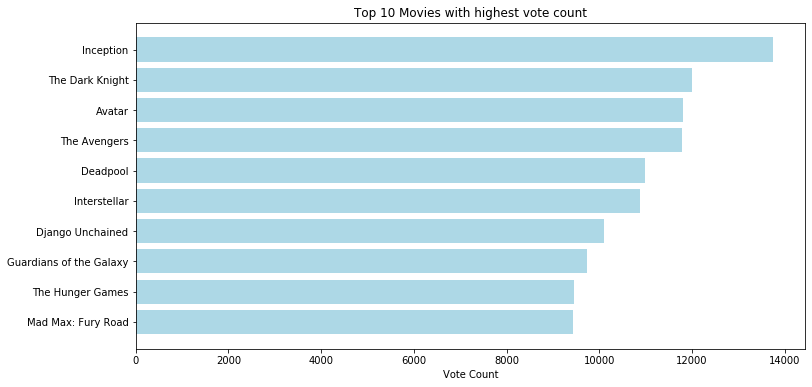

In [12]:
#Top 10 movies based on vote count
pop= movies_data.sort_values('vote_count', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(10),pop['vote_count'].head(10), align='center',
        color='lightblue')
plt.gca().invert_yaxis()
plt.xlabel("Vote Count")
plt.title("Top 10 Movies with highest vote count")

Text(0.5, 1.0, 'Top 10 Movies with longest Runtime')

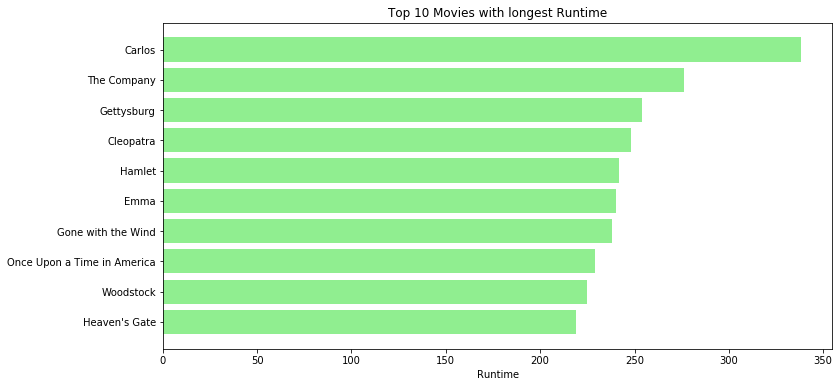

In [13]:
#Top 10 movies based on movie runtime
pop= movies_data.sort_values('runtime', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.barh(pop['title'].head(10),pop['runtime'].head(10), align='center',
        color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel("Runtime")
plt.title("Top 10 Movies with longest Runtime")

Now, we have to keep in mind that this demographic recommender gives a general recommendation to all users as they are not sensitve to user's interest or taste of a particular user.

This is the point from where we will consider user's interest and refine our system by implementing Content Based Filtering for recommendation.

<h2>Implementation of Content based filtering starts from here... </h2>

We will implementing two types of Content based filtering-
<li> Recommending movies based on the plot description
<li> Recommending movie  based on the movie's metadata like director, actors, genre, description etc.

<h3> Plot based recommendation </h3>

In [14]:
#We have a column named Overview containing the description of plot of different movies

#Importing TfIdfVectorizer from scikit-learn to convert the word vector of each overview to find the distinct number of terms used in the overview of all the movies.
from sklearn.feature_extraction.text import TfidfVectorizer

#Removing all the english stop words like 'a', 'the' etc. which doesn't hold any importance in our case
tfidf_v = TfidfVectorizer(stop_words='english')

#If there is any NaN value in any of the overview row, replacing it with an empty string
movies_data['overview'] = movies_data['overview'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data to find the distinct number of terms used in the overview of all the movies. 
tfidf_m = tfidf_v.fit_transform(movies_data['overview'])

#Output the shape of tfidf_matrix
tfidf_m.shape

(4803, 20978)

<li>To find the similarity between the overview of two movies, we will use either the cosine similarity score or the linear_kernal() <br>
<li>As we have used TF-IDF vectorizer, cosine similarity score can be easily obtained by the dot product. So, we will use linear_kernel() as it will be faster than cosine_similarities(). <br>
<li>For a smaller dataset which we are using, it wouldn't matter much but with much bigger dataset, speed difference can see observed.



In [15]:
# Importing linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity matrix using linear_kernel()
cosine_sim1 = linear_kernel(tfidf_m, tfidf_m)

Now, we will create a function that takes a movie title as an input, and outputs a list of top 5 most similar films.<br><br>
For this, we will have to perform reverse mapping of the movie titles and indices. As to we want to indentify the index of the movie by it's title in our dataframe.

In [16]:
#Reverse mapping of movie titles and indices 
indices = pd.Series(movies_data.index, index=movies_data['title']).drop_duplicates()

In [17]:
# Below is the heart of the recommendation system which is a function that takes movie title as an input and outputs the most similar movies
def recommend(movie_title, cosine_sim1=cosine_sim1):
    # Finding the index of the movie that matches the title
    movie_index = indices[movie_title]

    # Calculating the pairwsie similarity scores of all movies with input movie title
    sim_score = list(enumerate(cosine_sim1[movie_index]))

    # Sorting the movies based on the similarity scores
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)

    # Scores of the top 5 most similar movies
    sim_score = sim_score[1:6]

    # Getting the movie indices of the most similar movies
    movie_indices = [i[0] for i in sim_score]

    # Return the top 5 most similar movies as recommendation
    return movies_data['title'].iloc[movie_indices]

<h4>Below are the recommendation results for 3 movies 'Jurassic World', 'Minions' and 'Interstellar' based on their plot overview.</h4>

In [18]:
recommend('Jurassic World')

508     The Lost World: Jurassic Park
675                     Jurassic Park
2527      National Lampoon's Vacation
1580                      The Nut Job
1536                         Vacation
Name: title, dtype: object

In [19]:
recommend('Minions')

506     Despicable Me 2
221     Stuart Little 2
1218     The Guilt Trip
2511         Home Alone
3944            Freeway
Name: title, dtype: object

In [20]:
recommend('Interstellar')

1709    Space Pirate Captain Harlock
300                Starship Troopers
4353               The Green Inferno
220                       Prometheus
2260                 All Good Things
Name: title, dtype: object

<h3>Movie's metadata based recommendation like based on like cast, director , genre, description, keywords etc.</h3>

In our dataset, as the values for columns like cast, crew, keywords and genres is present in the form of "stringified" list, we will have to convert them into usable structure

In [21]:
# Parsing the stringified values into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies_data[feature] = movies_data[feature].apply(literal_eval)
    


Now, we will write functions to extract required information from each feature 

In [22]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def find_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [23]:
# Returns the top 5 elements of the list or the entire list; whichever is more.
def top_list(x):
    if isinstance(x, list):
        values = [i['name'] for i in x]
        #Check if more than 5 elements exist. If yes, return only first five. If no, return entire list.
        if len(values) > 5:
            values = values[:5]
        return values

    #Return empty list in case of missing/malformed data
    return []

In [24]:
# Finding and saving director, cast, genres and keywords features that are in a suitable form.
movies_data['director'] = movies_data['crew'].apply(find_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies_data[feature] = movies_data[feature].apply(top_list)

In [25]:
# Printing the new features of the first 5 films. As you can see below, all the values from "stringified" list format has been converted to a usable structure
movies_data[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi6]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]"


Now, we will update the names and keyword instances into lower case and to remove all the spaces between them. We are doing this because we don't want our vectorizer to count Bruce of "Bruce Willis" and "Bruce Lee" as same.

In [26]:
#Conerting all the date to lower case and removing all the spaces
def clean_features(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [27]:
#Applying clean_features function to our features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies_data[feature] = movies_data[feature].apply(clean_features)

Now, we will create metadata for all the movies aggregrating the values from different features which we want to feed to our vectorizer

In [28]:
def create_metadata(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies_data['metadata'] = movies_data.apply(create_metadata, axis=1)

Now the next steps will be the same as we did for our plot description based recommender. But the most important difference here is that we are using the CountVectorizer() instead of TF-IDF because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. 

In [29]:
#Importing CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

word_count = CountVectorizer(stop_words='english')
word_count_matrix = word_count.fit_transform(movies_data['metadata'])

In [30]:
#Calculating the Cosine Similarity matrix based on the word_count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(word_count_matrix, word_count_matrix)

In [31]:
#Reseting the index of our main DataFrame and constructing reverse mapping as we did before for plot based recommendation
movies_data = movies_data.reset_index()
indices = pd.Series(movies_data.index, index=movies_data['title'])

We can now reuse our recommend() function by passing in the new cosine_sim2 matrix as our second argument to get recommendation based on actor, director, genre, keywords etc.

In [32]:
recommend('Jurassic World', cosine_sim2)

334                 Jurassic Park III
508     The Lost World: Jurassic Park
1272                         Impostor
342                      Men in Black
3305              The Blood of Heroes
Name: title, dtype: object

In [33]:
recommend('Minions', cosine_sim2)

359            Alvin and the Chipmunks: The Road Chip
848     The Pirates! In an Adventure with Scientists!
503              The Adventures of Rocky & Bullwinkle
130                                              Bolt
2464                           The Master of Disguise
Name: title, dtype: object

In [34]:
recommend('Interstellar', cosine_sim2)

270               The Martian
365                   Contact
2375         Midnight Special
3       The Dark Knight Rises
108        Terminator Genisys
Name: title, dtype: object